<a href="https://colab.research.google.com/github/daphnecor/Computational_neuroscience/blob/main/ACNS_Week1_Weekly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Computational Neuroscience
```
Student: Daphne Cornelisse (s1066862)
``` 


# Weekly exercises 

## DA Chapter 1: Ex. 1 

>  Generate spikes for 10 s (or longer if you want better statistics) using
a Poisson spike generator with a constant rate of 100 Hz, and record
their times of occurrence. Compute the coefficient of variation of the
interspike intervals, and the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100 ms. Plot the interspike
interval histogram.

In [ ]:
'''
Dependencies  
'''
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')
from scipy.stats import kde
sns.set_style('white')
# to change default color cycle
color_scheme = ['#616F85', '#C2BAA3', '#F5E6CE', '#DD9D7C', '#C9445F']
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_scheme)
np.random.seed(0) # reproducability

In [ ]:
'''
Parameterise
'''
T = 10 # s
dt = 0.001 # ms
lam = 100 # firing rate (Hz) 
N = int(T/dt)  # steps

In [ ]:
'''
Generate 10 spike trains
'''
y = np.zeros((T, N))

for i in range(T):
  for j in range(N):
    if np.random.uniform(0,1) < lam*dt: y[i,j] = 1 

An interspike interval (ISI) is the time in-between subsequent spikes. Computing the differences between spikes for a spike-train yields a distribution. 

<!-- ![](https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png) -->

<img src="https://www.tau.ac.il/~tsirel/dump/Static/knowino.org/w/images/3/38/Spiketimes.png" alt="drawing" width="400"/>

In [ ]:
isi = []
for tr in range(T):
  y_tr = y[tr, :] # take spike train of one trial
  spike_times = np.where(y_tr==1) # find indices where neuron spikes
  isi.append(list(np.diff(spike_times)[0])) # store interspike-intervals 

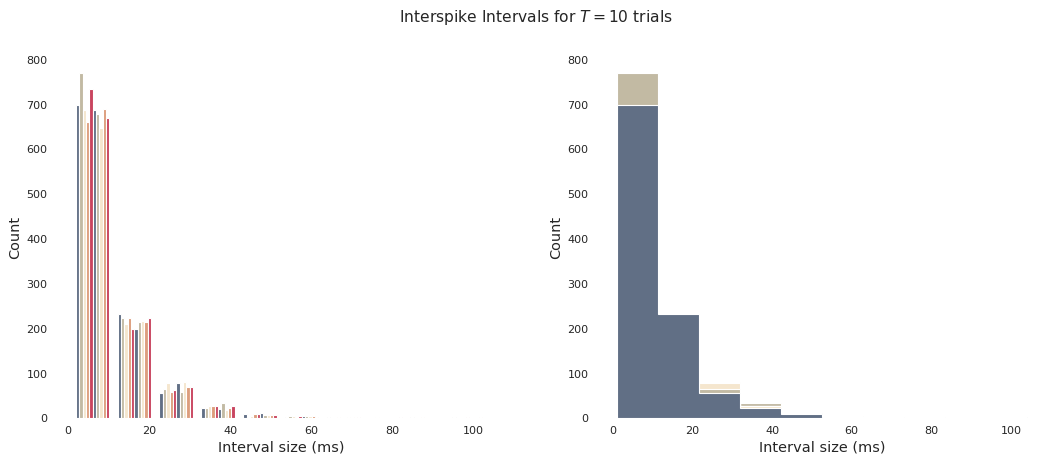

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), dpi=80)
fig.suptitle(r'Interspike Intervals for $T=10$ trials', fontsize=14)
ax1.hist(isi)
ax1.set_xlabel('Interval size (ms)', fontsize=13)
ax1.set_ylabel('Count', fontsize=13);

ax2.hist(isi, histtype='stepfilled')
ax2.set_xlabel('Interval size (ms)', fontsize=13)
ax2.set_ylabel('Count', fontsize=13)
sns.despine(left=True, bottom=True);

The Coefficient of variation is the ratio of the standard deviation to the mean 
\begin{align}
  C_V = \frac{\sigma_{\tau}}{\langle \tau \rangle}
\end{align}

In [ ]:
'''
Coefficient of variation
'''
Cv_arr = []
for tr in range(T): # iterate through trials
  isi_tr = y[:, tr] 
  Cv_arr.append(np.mean(isi_tr) / np.std(isi_tr))

Cv_arr

[0.3333333333333333,
 1.0,
 nan,
 0.49999999999999994,
 0.3333333333333333,
 0.3333333333333333,
 nan,
 nan,
 0.3333333333333333,
 0.3333333333333333]

The Fano Factor is another measure to quantify the amount of variability in a spike train. It is defined as 
\begin{align}
 F = \frac{\sigma^2}{\langle n \rangle}
\end{align}
where $\sigma^2$ is the variance and $\langle n \rangle$ the expected value


## Handouts Chapter 2

### Ex. 1

---

> Show that the Gamma distribution for large $N$ becomes the Gaussian distribution.

---

We consider the probability density $I_k(t)$ for a certain interval between the last spike before the $k$th spike and the $k$th spike. This density follows a  Gamma distribution given by
\begin{align}
  I_k(t) &= \frac{\lambda^k t^{k-1}}{(k-1)!} \exp(-\lambda t),
\end{align}
with mean $k\lambda$ and variance $k\lambda^{2}$. We show that the standardised Gamma distribution converges to the normal distribution, that is, 
\begin{align}
  Z_k = \frac{X - k\lambda}{\sqrt{k\lambda^2}} \xrightarrow{d} \mathcal{N}(0, 1),
\end{align}
where $X ~ \text{Gamma}(k, \lambda)$. The MGF of the standardized Gamma distribution is given by
\begin{align}
  M_{Z_{k}}(\tau) &= \mathbb{E}\left[\exp(\tau Z_{k})\right] \\
    &= \mathbb{E}\left[\exp\left(\tau \frac{X - k\lambda}{\sqrt{k\lambda^{2}}}\right)\right] \\
    &= \exp(-\sqrt{k}\tau)\mathbb{E}\left[\frac{\tau}{\sqrt{k\lambda^{2}}}X\right] \\
    &= \exp(-\sqrt{k}\tau)M_{X}\left(\frac{\tau}{\sqrt{k\lambda^{2}}}\right) \\
    &= \exp(-\sqrt{k}\tau)\left(1 - \frac{\tau}{\sqrt{k}}\right)^{-k} \\
    &= \left[\exp\left(\frac{\tau}{\sqrt{k}}\right) - \frac{\tau}{\sqrt{k}}\exp\left(\frac{\tau}{\sqrt{k}}\right)\right]^{-k},
\end{align}
where we substituted the MGF of the Gamma distribution. Using the Taylor expansion of the exponential function around zero, we find
\begin{align}
  M_{Z_{k}}(\tau) &= \left[\exp\left(\frac{\tau}{\sqrt{k}}\right) - \frac{\tau}{\sqrt{k}}\exp\left(\frac{\tau}{\sqrt{k}}\right)\right]^{-k} \\
    &= \left[\sum_{i=0}^{\infty} \frac{(\tau/\sqrt{k})^{i}}{i!} - \sum_{i=0}^{\infty} \frac{(\tau/\sqrt{k})^{i + 1}}{i!}\right]^{-k} \\
    &= \left[1 - \frac{\tau^{2}}{2k} + (\mathcal{H}(k^2))^{-1}\right]^{-k},
\end{align}
where $\mathcal{H}$ denotes the higher order terms. Now as $k \to \infty$, we find that
\begin{align}
  \lim_{k \to \infty} M_{Z_{k}}(\tau) = \exp\left(\frac{t^{2}}{2}\right),
\end{align}
using the standard limit. This is the MGF of the standardized normal distribution and as the MGF uniquely identifies a distribution, it follows that the standardised Gamma distribution converges to the standardised normal distribution.

Thus, this shows that the ISI distribution for neurons in the brain converges to the normal distribution if we have a sufficiently large number of observations. 


### Ex. 2

---

> Verify that the Laplace transformation of $f(t)=\frac{1}{\sqrt \pi t}$ is $\hat{f}(s) = \frac{1}{\sqrt s}$

---

If $f(t)$ is a function of $t$, then the Laplace transform of $f$, denoted by $\hat{f}$ is given by
\begin{align}
& \hat{f}(s) = \int_{0}^{\infty} f(t) \exp(-st) dt
\end{align}
We subsitute $f(t) =  \frac{1}{\sqrt{\pi t}}$ in the definition above and simplify

\begin{align}
\hat{f}(s) &= \int_{0}^{\infty} \exp(-st) \frac{1}{\sqrt{\pi t}} dt \\
&= \frac{1}{\sqrt{\pi}} \int_{t=0}^{t=\infty} \exp(-st) \frac{1}{\sqrt{t}} dt  \\
\end{align}

We do a u-sub
$$
u = st \quad du = s \: dt \rightarrow dt = \frac{1}{s} du
$$ 
and integrate

\begin{align}
\hat{f}(s) &= \frac{1}{\sqrt{\pi}} \int\limits_{u=0}^{u=\infty} \exp(-u) \frac{\sqrt{s}}{\sqrt{ u}} \frac{1}{s} du \\
\hat{f}(s) &=  \frac{\sqrt{s}}{\sqrt{\pi} s} \int_{u=0}^{u=\infty} \exp(-u) \frac{1}{\sqrt{ u}}  du 
\end{align}

Another one
$$
w = \sqrt{u} \quad dw = \frac{1}{2 \sqrt{u}} du \rightarrow du = 2 \sqrt{u} dw 
$$ 

\begin{align}
\hat{f}(s) &=  \frac{\sqrt{s}}{\sqrt{\pi}s} \int_{0}^{\infty} \exp(-w^2) \frac{1}{\sqrt{ u}} 2 \sqrt{u} dw \\
\hat{f}(s) &=  \frac{2 \sqrt{s}}{\sqrt{\pi} s} \int_{0}^{\infty} \exp(-w^2)  dw 
\end{align}

Recognising the gaussian integral, integration yields

\begin{align}
\hat{f}(s) &= \frac{2 \sqrt{s} }{\sqrt{\pi} s} \frac{1}{2} \sqrt{\pi} \\
&= \frac{\sqrt{s}}{s} \\
&= \frac{1}{\sqrt{s}}
\end{align}

which shows that the Laplace transform of $f(t)=\frac{1}{\sqrt \pi t}$ is $\hat{f}(s) = \frac{1}{\sqrt s}$

### Ex. 3a

---

> For a diffusion process in one dimension that starts at $t=t_0$ at location $v=v_0$, the probability to observe the membrane potential $v$ at a later $t$ is given by
\begin{align}
  p(t, v | t_0, v_0) = \frac{1}{\sqrt{2 \pi (t-t_0)\sigma}} \exp \left(- \frac{(v-\langle v \rangle_t)^2)}{2\sigma^2 (t-t_0)} \right)
\end{align}
with $\langle v \rangle_t = v_0 + \mu (t-t_0)$. The first passage time distribution satisfies the integral equation
\begin{align}
  p(t, v_{th} | 0,0) = \int_0^t dt' p(t, v_{th} | t', v_{th}) \rho(t', v_{th})
\end{align}
a) Using Laplace transforms, compute the first passage time distribution for $\mu=0$, following the derivation in the text.

---

\begin{align}
  p(t, v | t_0, v_0) = \frac{1}{\sqrt{2 \pi (t-t_0)\sigma}} \exp \left(- \frac{(v-v_0^2)}{2\sigma^2 (t-t_0)} \right)
\end{align}

We have that 
\begin{align}
    f_1(t) = p(t, v_{th} | t', v_{th}) 
\end{align}
and
\begin{align}
    f_2(t) = p(t', v_{th})
\end{align}

Since $\mu=0$ we have
\begin{align}
    \hat{f_1}(s) &= \frac{1}{\sqrt{2s}} \exp \left( - \sqrt{2s} \frac{v_{th}}{\sigma} \right) \\
    \\
    \hat{f_2}(s) &= \frac{1}{\sqrt{2s} \sigma}
\end{align}

Therefore, the first passage time distribution for $\mu = 0$ is
\begin{align}
    \rho(t) = \frac{v_{th}}{\sqrt{2\pi} \sigma t^{3/2}} \exp \left( \frac{v_{th}^2}{2 \sigma^2 t} \right) 
\end{align}
 

<!-- \begin{align}
  p(t, v | t_0, v_0) = \frac{1}{\sqrt{2 \pi (t-t_0)\sigma}} \exp \left(- \frac{(v-v_0^2)}{2\sigma^2 (t-t_0)} \right)
\end{align} -->


## DA Chapter 5: Ex 3.

---

> Build a model integrate-and-fire neuron from equation 5.8. Use $V_{rest} = -70$ mV, $R_m = 10$ MQ, $\tau_m = 10$ ms. Initially set $V = V_{rest}$.
When the membrane reaches $V_{th} = -54$ mV, make the neuron fire a spike and reset the potential to $V_{reset}=-80$ mV. Show sample voltage traces (with spikes) for a 300-ms-long current pulse (choose a reasonable current $I_e$) centered in a 500-ms-long simulation. Determine the firing rate of the model for various magnitudes of constant $I_e$ and compare the results with equation 5.11.

\begin{align}
  \tau_m \frac{dV}{dt} = V_{rest} - V + R_m I_e \qquad [eq. 5.8]
\end{align}

---


In [ ]:
'''
Parameterise integrate-and-fire neuron
'''
v_rest = -70.0 # mV
v_th = -54.0   # mV
v_reset = -80  # mV
R_m = 10.0     # mOhm
tau_m = 10.0   # ms
dt = 0.1       # ms

# differential equation
dvdt = lambda I_e, v: ((v_rest - v) + R_m * I_e)/tau_m

sim_time = 500  # total simulation time (ms)
stim_time = 300 # time that a current is applied (ms)

In [ ]:
def integrate_and_fire(I_e):
  ''' Integrate and fire neuron model '''

  apply_I = np.full(stim_time, I_e)
  no_I = np.zeros(sim_time-stim_time)
  I_range = np.concatenate((apply_I, no_I), axis=0)

  v = np.zeros(sim_time+1) 
  spiketrain = np.zeros(sim_time+1)
  v[0] = v_rest 
      
  for t in range(sim_time):
      I_e = I_range[t]
      v_next = dvdt(I_e, v[t]) # get differential
      v[t+1] = v[t] + v_next * dt # update v
      if v[t+1] > v_th: # check if there is a spike and reset
          v[t+1] = v_reset
          spiketrain[t+1] = 1

  return v, spiketrain, np.where(spiketrain==1), I_range

In [ ]:
'''
Set a current (I_e) and run 
'''
v, spiketrain, spiketimes, I_range = integrate_and_fire(I_e=14)

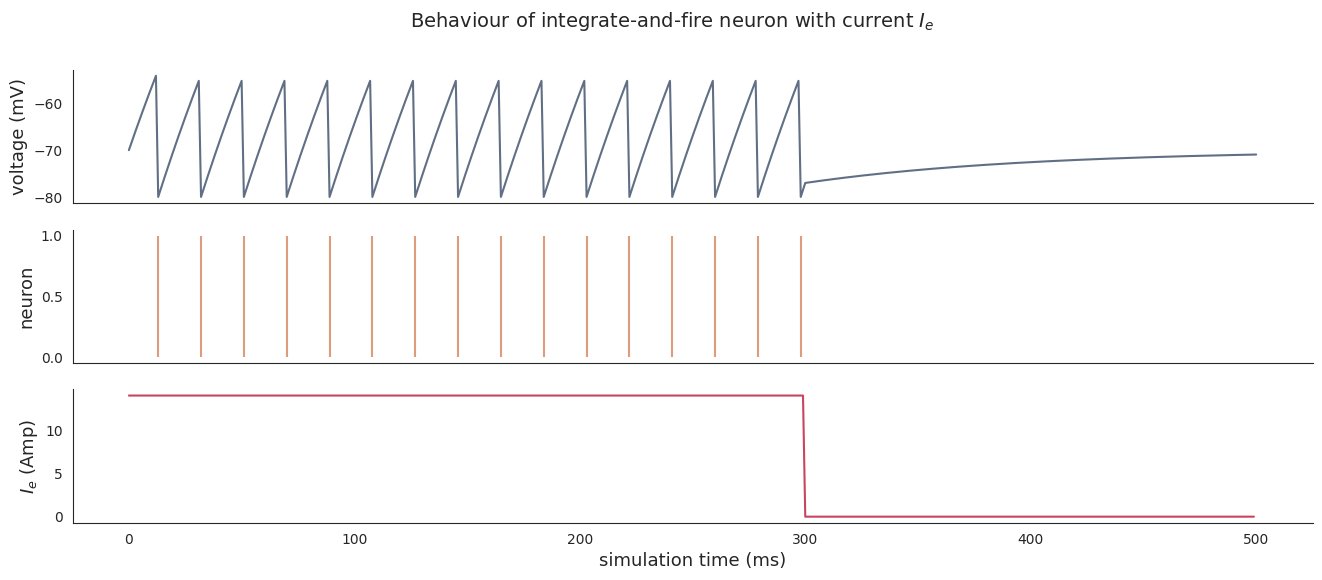

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16,6), dpi=100, sharex=True)
fig.suptitle(r'Behaviour of integrate-and-fire neuron with current $I_e$', fontsize=14)
ax1.plot(v)
ax1.set_ylabel('voltage (mV)', fontsize=13)

ax2.vlines(spiketimes, 0, 1, colors=color_scheme[3])
ax2.set_xticks([0, 100, 200, 300, 400, 500])
ax2.set_ylabel('neuron', fontsize=13)

ax3.plot(I_range, c=color_scheme[4])
ax3.set_xlabel('simulation time (ms)', fontsize=13)
ax3.set_ylabel(r'$I_e$ (Amp)', fontsize=13)
sns.despine(left=False, bottom=False);

In [ ]:
'''
Test firing rate for range of input currents Ie
'''
Iarr = np.arange(0, 50, 1)
total_spikes = []

for c in Iarr:
  v, spiketrain, spiketimes, I_range = integrate_and_fire(I_e=c)
  total_spikes.append(sum(spiketrain)*2) # count all spikes that occured in simulation * 2 (1000 ms)

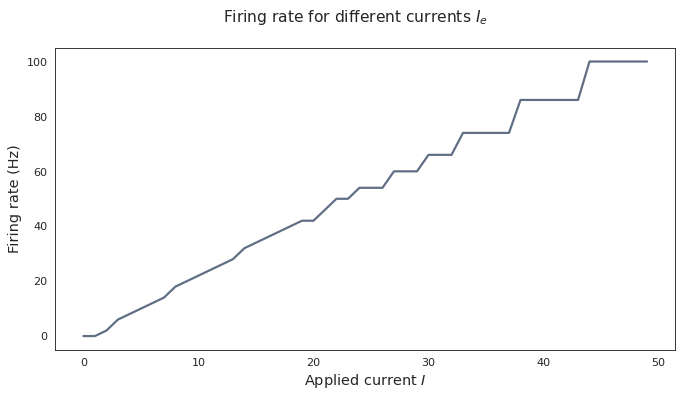

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,5), dpi=80)
fig.suptitle(r'Firing rate for different currents $I_e$', fontsize=14)
ax.plot(Iarr, total_spikes, lw=2)
ax.set_xlabel(r'Applied current $I$', fontsize=13)
ax.set_ylabel('Firing rate (Hz)', fontsize=13);

```
Student: Daphne Cornelisse (s1066862)
``` 